In [85]:
! pip install scipy

In [86]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import cv2

In [87]:
dataset = io.loadmat(
    r"C:\Users\sajad\VSCode\Machine_Learning\Machine_Learning\Data_hoda_full.mat"
)

In [88]:
dataset

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jun 30 20:26:30 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Data': array([[array([[  0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                   0,   0,   0,   0,   0,   0,   0],
                [  0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                   0,   0,   0,   0,   0,   0,   0],
                [  0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                   0,   0,   0,   0, 255, 255,   0],
                [  0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                   0,   0,   0, 255, 255, 255, 255],
                [  0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
                   0,   0, 255, 255, 255, 255,   0],
                [  0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                   0, 255, 255, 255, 255, 255,   0],
                [255, 255, 255, 255,   0,  

In [89]:
type(dataset)

dict

In [90]:
dataset["Data"].shape

(60000, 1)

In [91]:
dataset["Data"][:,0][0]

array([[  0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 255, 255, 255, 255],
       [  0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255, 255, 255, 255, 255,   0],
       [255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255,   0,   0,   0],
       [255, 255, 255,   0,   0,   0,   0,   0,   0,   0, 255, 2

In [92]:
np.squeeze(dataset["Data"]).shape

(60000,)

In [93]:
data = np.squeeze(dataset["Data"])[17]

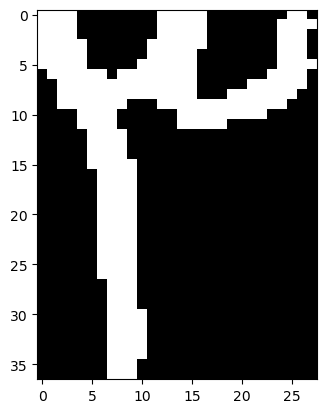

In [94]:
plt.imshow(data, cmap= "gray")

In [95]:
lbl = np.squeeze(dataset["labels"])[17]

In [96]:
lbl

np.uint8(3)

In [97]:
X_train = np.squeeze(dataset["Data"][:6000])
Y_train = np.squeeze(dataset["labels"][:6000])

In [98]:
x_test = np.squeeze(dataset["Data"][8000:10000])
y_test = np.squeeze(dataset["labels"][8000:10000])

In [99]:
x_train_10by10  = [cv2.resize(img, dsize=(10, 10)) for img in X_train]
x_test_10by10   = [cv2.resize(img, dsize=(10, 10)) for img in x_test]

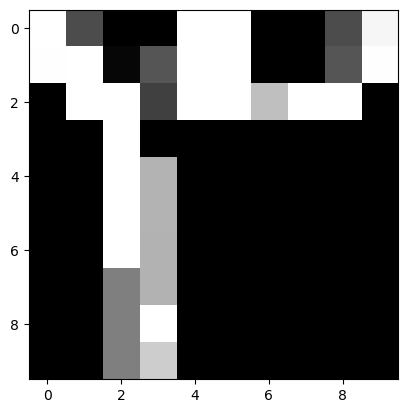

In [100]:
in_image = x_train_10by10[17]
plt.imshow(in_image, cmap="gray")
plt.show()

In [101]:
x_train = np.reshape(x_train_10by10, [-1, 100])
x_test = np.reshape(x_test_10by10, [-1, 100])

In [102]:
x_train.shape

(6000, 100)

In [103]:
x_test.shape

(2000, 100)

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
knn = KNeighborsClassifier(n_neighbors=3)

In [106]:
knn.fit(x_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [107]:
pred_lbl = knn.predict(x_test)

In [108]:
pred_lbl

array([8, 2, 2, ..., 2, 2, 8], shape=(2000,), dtype=uint8)

In [109]:
pred_lbl[0]

np.uint8(8)

In [110]:
y_test[0]

np.uint8(8)

In [111]:
knn.score(x_test, y_test)

0.9735

In [112]:
image = np.squeeze(dataset["Data"])[9000]

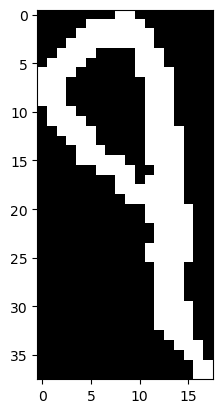

In [113]:
plt.imshow(image, cmap="gray")

In [114]:
image = cv2.resize(image, (10 , 10))

In [115]:
image = np.reshape(image, [1, 100])

In [116]:
image.shape

(1, 100)

In [117]:
knn.predict(image)

array([9], dtype=uint8)